<a href="https://colab.research.google.com/github/Douglas1997Ortiz/predicciones-de-ventas/blob/main/Proyecto_Parte6ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import set_config
import seaborn as sns
import matplotlib.pyplot as plt


In [129]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
dfventas= pd.read_csv('/content/drive/MyDrive/Coding Dojo/PROYECTO 1/sales_predictions.csv')
dfventas.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [132]:
dfventas.shape

(8523, 12)

In [133]:
dfventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [134]:
dfventas.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [135]:
# Identifiquen el objetivo (X) y las características (y): Asignen la columna "Item_Outlet_Sales" somo el objetivo y el resto de las variables relevantes como el matriz de características. 
X = dfventas.drop('Item_Outlet_Sales', axis=1)
y = dfventas['Item_Outlet_Sales']

In [136]:
# Realicen un train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [137]:
# Creen un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático.

In [138]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [139]:
# Se utiliza la imputacion de moda en la variable del tamano de los locales 
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse= False)

In [140]:
# Numeric pipeline
numeric_pipe = make_pipeline(num_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [141]:
# Categorical pipeline
categorical_pipe = make_pipeline(cat_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [142]:
# Instanciar ColumnTransformer
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4e7eb8b0d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4e7eb8b700>)])

In [143]:
# Transformador de datos
# fit on train
preprocessor.fit(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4e7eb8b0d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4e7eb8b700>)])

In [144]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [145]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1595)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

# 1) La primera tarea será crear un modelo de regresión lineal para predecir las ventas.

* Creen un modelo de regresión lineal.
* Evalúen el rendimiento del modelo basándose en r^2.
* Evalúen el rendimiento del modelo basándose en RECM.

<Axes: >

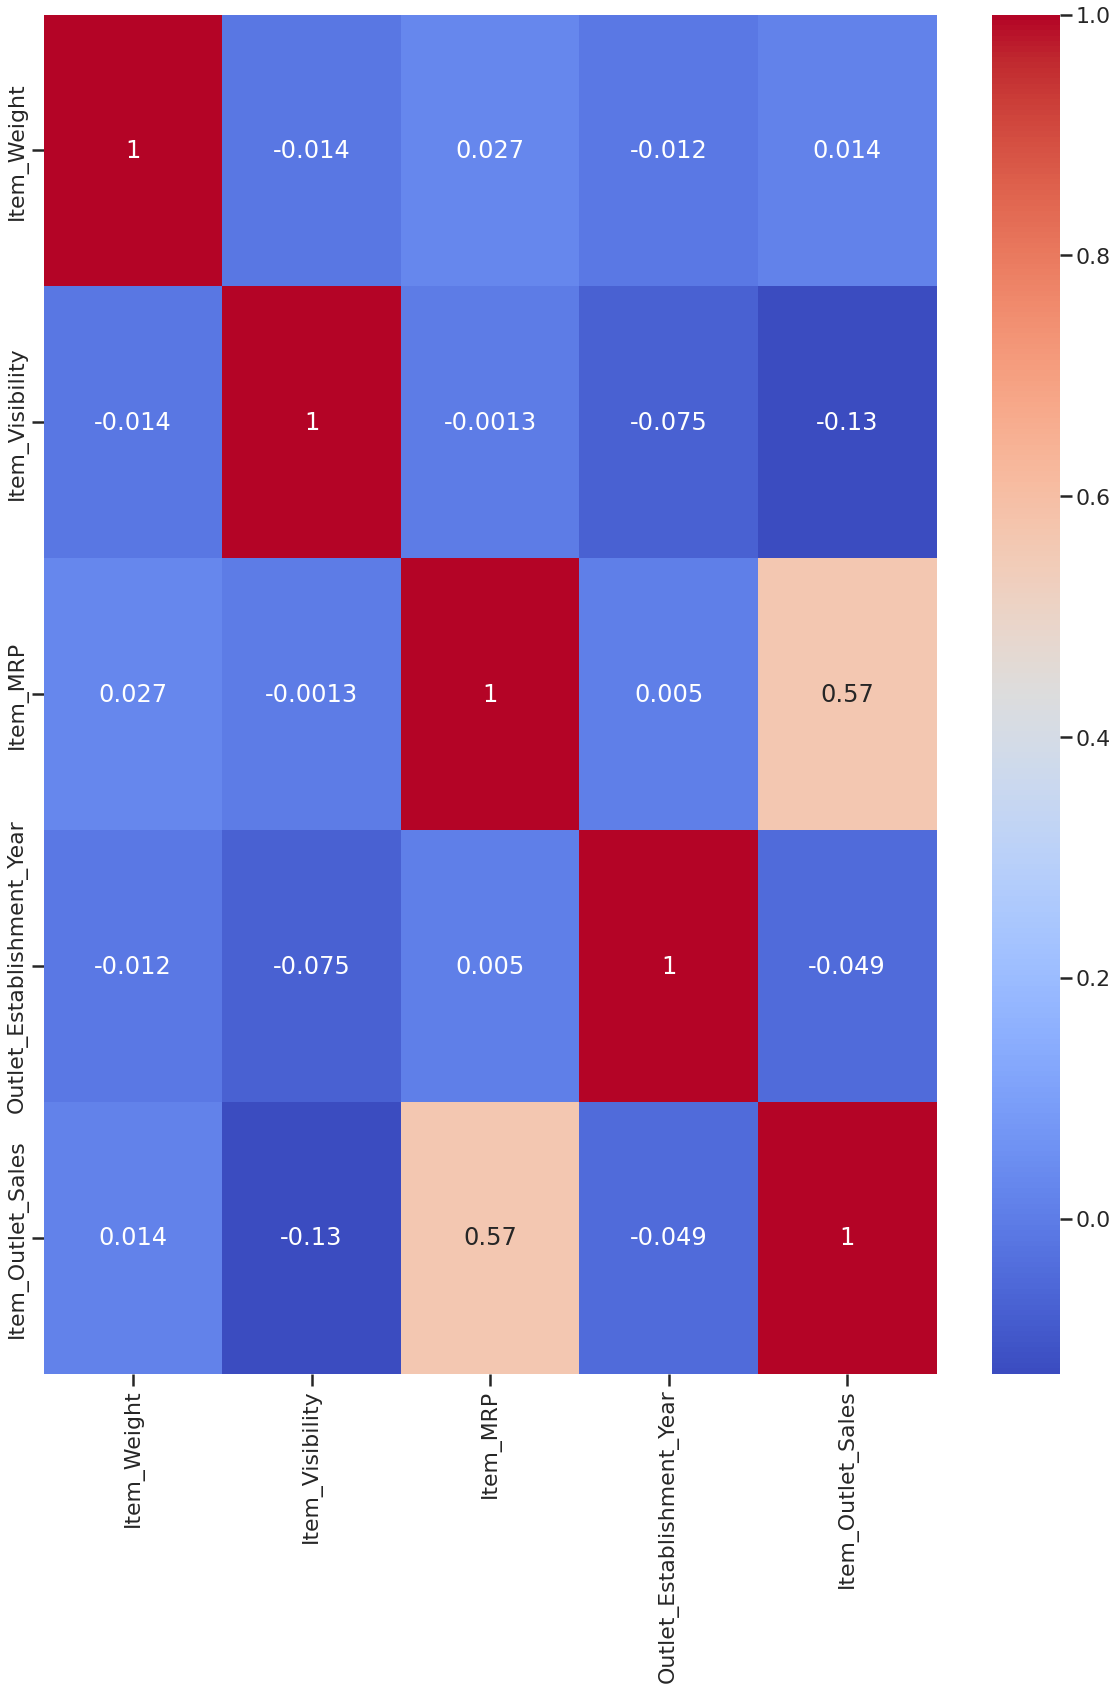

In [161]:
plt.figure(figsize=(20, 25)) #8 de ancho y 6 de largo
sns.set_context("poster")
sns.set_style("ticks", {"axes.facecolor": ".4"})
corr_matriz= dfventas.corr()
sns.heatmap(corr_matriz, annot= True, cmap= 'coolwarm')

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
reg = LinearRegression()
reg.fit(X_train_processed,y_train)

LinearRegression()

In [148]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [149]:
test_preds_regresion = reg.predict(X_test_processed)

In [150]:
predicciones_regresion= pd.DataFrame(test_preds_regresion)

In [151]:
predicciones_regresion.head()

,0
0,833.5
1,1024.5
2,1300.0
3,3705.5
4,1854.0


In [156]:
import statsmodels.formula.api as smf

In [157]:
dfventas.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [158]:
lm= smf.ols(formula="Item_Outlet_Sales ~ Outlet_Type + Outlet_Location_Type + Outlet_Size + Outlet_Establishment_Year + Outlet_Identifier + Item_MRP + Item_Type + Item_Visibility + Item_Fat_Content + Item_Weight + Item_Identifier ", data=dfventas).fit()

In [159]:
lm.params

Intercept                           6.004801e-01
Outlet_Type[T.Supermarket Type1]    9.813024e+01
Outlet_Type[T.Supermarket Type2]   -9.752976e+01
Outlet_Type[T.Supermarket Type3]    2.796111e-08
Outlet_Location_Type[T.Tier 2]      4.839874e+01
                                        ...     
Item_Identifier[T.NCZ54]            2.689027e+03
Outlet_Establishment_Year           1.908972e+00
Item_MRP                           -1.512757e+01
Item_Visibility                     1.620162e+02
Item_Weight                         1.040391e+01
Length: 1598, dtype: float64

In [ ]:
#R2
r2_test = r2_score(y_test, test_preds_regresion)
print(r2_test)

-1.3626481644711636e+18


In [ ]:
# ECM
mse_test = mean_squared_error(y_test, test_preds_regresion)
print(mse_test)

3.759515337047367e+24


In [ ]:
# raiz de RECM 
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds_regresion))
print(rmse_test )

1938946966022.3735


# 2) La segunda tarea será crear un modelo de árbol de regresión para predecir las ventas.

Creen un modelo simple de árbol de regresión.
Comparen el rendimiento del modelo basándose en r^2.
Comparen el rendimiento del modelo basándose en RECM.  

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
test_preds_arbol = dec_tree.predict(X_test_processed)

In [ ]:
predicciones_arbol= pd.DataFrame(test_preds_arbol)

In [ ]:
predicciones_arbol.head()

,0
0,792.3020
1,1249.0408
2,1216.4166
3,4763.7990
4,3350.3056


In [ ]:
# evalúen el modelo r2
test_score = dec_tree.score(X_test_processed, y_test)
print(test_score)

0.22560314645107293


In [ ]:
# Parametros para el cambio
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
# ¿Cuál era la profundidad de nuestro árbol por defecto?
dec_tree.get_depth()

81

In [ ]:
# ¿Cuántos nodos hojas?
dec_tree.get_n_leaves()

6264

In [ ]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 81))# will try every value between 2 and 36
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

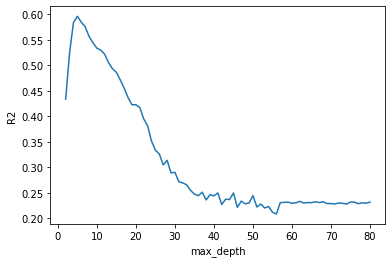

In [ ]:
# Visualicen qué max_depth lleva a una puntuación R2 más alta
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [ ]:
# Ejecutemos el modelo con nuestro valor optimizado para max_depth
dec_tree_9 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_9.fit(X_train_processed, y_train)
test_9_score = dec_tree_9.score(X_test_processed, y_test)
print(test_9_score) 
# R2
# con una profundidad de 5 

0.5960564372160062


In [ ]:
# Comparen el rendimiento del modelo basándose en RECM. 
# Raiz de ECM
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds_arbol))
print(rmse_test)

1461.6919411047


# 3) Acaban de intentar 2 diferentes modelos en el conjunto de datos. Deben determinar qué modelo implementar.

* En general, ¿qué modelo recomiendan?
* Justifiquen su recomendación.

* Se recomienda el modelo de arboles de decision, ya que es el modelo que mas se ajusta a nuestro caso, con un r2 de casi el 60%, y un RECM de 1461.69, lo que nos dice que el 60% de las variables independientes, explican a las variables dependientes en una profundidad de 5; y que tiene un error de mas menos 1461.69 dolares en la proyeccion de ventas.
* El modelo de la regresion lineal no se ajusto a nuestro proyecto, asi como su error fue demasiado grande 
